# Training Model
***


## About this model
***
The goal for this model is to produce a model that accurately predicts wind turbine power output from wind speed values, taken from the data set. [1] 
When the correct variables have been entered and the model has been trained, the model is then exported and used to predict the power generated from inputted wind speeds entered in from a web-service.
***


***
## What is a neural network?
***

**Neural Networks** are the base of Deep learning, which is a subset of machine learning. Algorithms for neural networks are inspired by the way the human brain functions. Neural networks take in datasets and then train themselves to recognise the patterns in the data using sophisticated libraries such as Keras. Then predict the outputs.
Neural networks are made up of layers of neurons, similar to our own human neurons. These can be thought of as the processing unit for the network. These networks consist of 3 layers.

- Input layer - This layer takes in the dataset that is going to be trained
- Hidden layers - These layers perform most of the computations required by the network.
- Output layer - Predicts the final output.

<br />
<img src="files/images/neural1.jpg">
<br />

Data is fed into the neurons of the input layer. The Neurons in the input layer are connected to the neurons of the next layer, these layers are connected through channels. Each channel is assigned a numerical value known as **weight**. Inputs are multiplied by the corresponding weights. The sum of these calculations is then sent to the hidden layer. Each neuron in the hidden layer is associated with a value called a **bias**. The bias is added to the input sum. The value is then passed through the **activation function**. The activation function determines whether or not a particular neuron gets activated. Activated neurons send data to the neurons in the next layer. This is called **forward propagation**. In the output layer, the neuron with the highest value determines the output. These values are in essence a probability.

The predicted output is compared against actual output to get the accuracy of a prediction. We can tell how wrong or right the network is by looking at the magnitude of the difference between the predicted and the actual results. **Back propagation** is then used to feed the data back in and re-train the model to come up with the most a

## Break down of code
***
To break to break down the structure of this model. I have divided each part of the code into sections.
- Section 1 - covers the imports used to build this model
- Section 2 - covers importing and gathering various information about the dataset used to train this model
- Section 3 - the model is trained and compared against the actual dataset.
- Section 4 - References

***

## Section 1
***
Various imports were used to build this model which are discussed below.
***
##### Tensorflow 
**TensorFlow** is an end-to-end open source platform for machine learning [2]. TensorFlow and it's imports are used in this project to create the neural network.
***

##### Keras
**Keras** [3] is a neural network library .
***

##### Keras models
**Models** [4] is a data structure from Keras this project used the **sequential model**. This model acts as a linear stack of layers. Each layer has exactly one input tensor and one output tensor.[5]

***
##### Layers
**Layers** [6]:[7] are the basic building blocks of neural networks in Keras. A layer consists of a tensor-in tensor-out computation function which is the layers call method and some state. This is held in TensorFlow variables (the layer's weights). **Dense** is used in this model which is the regular deeply connected neural network layer [6].
***
#### Keras python utils
This package contains useful utilitys for using python with Keras.
***
#### Numpy
**Numpy** [8] : [9] is a python library used to build powerful array objects and tools to utilise these objects.
***
#### Pandas
**Pandas** [9] : [10] is an open-source library built on top of numpy providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
***
#### Sklearn
**Sklearn** [10] : [11] is a library which contains a lot of great tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.
***
#### MathPlotLib
**MathPlotLib** [12] : [13] is used to create high-quality graphs, charts, and figures.
***






## Section 1

In [1]:
#Imports
# Neural networks.
import tensorflow.keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras import utils
# Numerical arrays
import numpy as np
# Data frames.
import pandas as pd
#Sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Plotting
import matplotlib.pyplot as plt

***
## Section 2
In this section the dataset is imported from its source and various functions are passed to give us information about the dataset.  
***

In [76]:
#Consant for Column names
COLUMN_NAMES = ['Speed', 'Power']

#Read in csv file
data = pd.read_csv(
    "https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")






In [77]:
#print out limited contents of the csv file(21) from 0-20
data.loc[0:20] 


speed  power
0   0.000  0.000
1   0.125  0.000
2   0.150  0.000
3   0.225  0.000
4   0.275  0.000
5   0.325  4.331
6   0.400  5.186
7   0.450  3.826
8   0.501  1.048
9   0.526  5.553
10  0.551  6.498
11  0.576  5.241
12  0.626  4.220
13  0.676  7.974
14  0.701  9.746
15  0.726  0.000
16  0.751  0.000
17  0.801  7.271
18  0.826  0.795
19  0.851  7.350
20  0.926  1.996

In [78]:
# convert data into an array
dataset = data.values
#Print out array
dataset

array([[0.00000e+00, 0.00000e+00],
       [1.25000e-01, 0.00000e+00],
       [1.50000e-01, 0.00000e+00],
       [2.25000e-01, 0.00000e+00],
       [2.75000e-01, 0.00000e+00],
       [3.25000e-01, 4.33100e+00],
       [4.00000e-01, 5.18600e+00],
       [4.50000e-01, 3.82600e+00],
       [5.01000e-01, 1.04800e+00],
       [5.26000e-01, 5.55300e+00],
       [5.51000e-01, 6.49800e+00],
       [5.76000e-01, 5.24100e+00],
       [6.26000e-01, 4.22000e+00],
       [6.76000e-01, 7.97400e+00],
       [7.01000e-01, 9.74600e+00],
       [7.26000e-01, 0.00000e+00],
       [7.51000e-01, 0.00000e+00],
       [8.01000e-01, 7.27100e+00],
       [8.26000e-01, 7.95000e-01],
       [8.51000e-01, 7.35000e+00],
       [9.26000e-01, 1.99600e+00],
       [9.51000e-01, 1.60900e+00],
       [9.76000e-01, 2.06400e+00],
       [1.00100e+00, 6.51100e+00],
       [1.02600e+00, 0.00000e+00],
       [1.05100e+00, 2.08500e+00],
       [1.07600e+00, 0.00000e+00],
       [1.10100e+00, 1.21000e-01],
       [1.15100e+00,

In [79]:
# display the columns found in the dataset
data.columns 


Index(['speed', 'power'], dtype='object')

In [80]:
# display information about the dataset
print(data.describe()) 

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


***
## Section 3
In section 3:

- The dataset is split into X and Y variables.
- An initial plot of the actual points of the datset is then generated.
- We then begin training the data
- Plots are then created to show the accuracy of the training compared to the actual results.
- An overall score of the accuracy of the training.
- The model is then saved and predictions are made based on several values

***

In [81]:
"""
split  dataset into input features (X) 

""" 
X = data['speed']
"""
feature we wish to predict (Y).
""" 
Y = data['power']



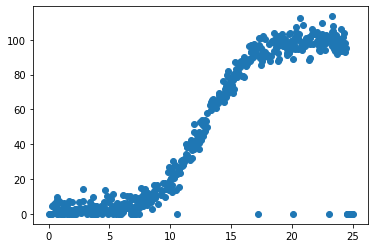

In [82]:
#plot results
plt.plot(X,Y,'o')

In [146]:
"""
specify Keras sequential model
- store model in the variable ‘model’

Dense : deeply connected neural network layer
input_shape: Shapes are tuples representing how many elements an array or tensor has in each dimension. 
Activation: Activation function to use.
kernel_initializer: Initializer for the kernel weights matrix. 
bias_initializer: Initializer for the bias vector
"""
model = kr.models.Sequential()
# Three Dense layers, a layer instance is callable on a tensor, and returns a tensor
model.add(kr.layers.Dense(128, input_shape=(1,), activation='relu', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(256, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error', metrics=['accuracy'])


In [167]:
# Train the neural network on our training data.
# change ctach size to 10
model.fit(data['speed'], data['power'], epochs=1000, batch_size=100)

Epoch 1/1000
5/5 [==============================] - 0s 2ms/step - loss: 129.3899 - accuracy: 0.0260
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - loss: 117.1565 - accuracy: 0.0160
Epoch 3/1000
5/5 [==============================] - 0s 4ms/step - loss: 140.6619 - accuracy: 0.0260
Epoch 4/1000
5/5 [==============================] - 0s 5ms/step - loss: 160.1150 - accuracy: 0.0220
Epoch 5/1000
5/5 [==============================] - 0s 5ms/step - loss: 134.3494 - accuracy: 0.0460
Epoch 6/1000
5/5 [==============================] - 0s 3ms/step - loss: 122.0116 - accuracy: 0.0100
Epoch 7/1000
5/5 [==============================] - 0s 4ms/step - loss: 103.8515 - accuracy: 0.0080
Epoch 8/1000
5/5 [==============================] - 0s 4ms/step - loss: 107.2274 - accuracy: 0.0240
Epoch 9/1000
5/5 [==============================] - 0s 7ms/step - loss: 125.5038 - accuracy: 0.0080
Epoch 10/1000
5/5 [==============================] - 0s 7ms/step - loss: 112.4954 - accuracy: 0.0060

5/5 [==============================] - 0s 4ms/step - loss: 103.9422 - accuracy: 0.0100
Epoch 163/1000
5/5 [==============================] - 0s 4ms/step - loss: 99.7069 - accuracy: 0.0120
Epoch 164/1000
5/5 [==============================] - 0s 3ms/step - loss: 107.9936 - accuracy: 0.0120
Epoch 165/1000
5/5 [==============================] - 0s 3ms/step - loss: 111.0882 - accuracy: 0.0100
Epoch 166/1000
5/5 [==============================] - 0s 3ms/step - loss: 110.9058 - accuracy: 0.0080
Epoch 167/1000
5/5 [==============================] - 0s 3ms/step - loss: 103.0620 - accuracy: 0.0160
Epoch 168/1000
5/5 [==============================] - 0s 3ms/step - loss: 99.6270 - accuracy: 0.0100
Epoch 169/1000
5/5 [==============================] - 0s 4ms/step - loss: 101.3591 - accuracy: 0.0140
Epoch 170/1000
5/5 [==============================] - 0s 3ms/step - loss: 117.2495 - accuracy: 0.0100
Epoch 171/1000
5/5 [==============================] - 0s 3ms/step - loss: 120.3032 - accuracy: 0.01

5/5 [==============================] - 0s 4ms/step - loss: 114.1156 - accuracy: 0.0220
Epoch 323/1000
5/5 [==============================] - 0s 4ms/step - loss: 106.1699 - accuracy: 0.0080
Epoch 324/1000
5/5 [==============================] - 0s 2ms/step - loss: 105.7223 - accuracy: 0.0040
Epoch 325/1000
5/5 [==============================] - 0s 3ms/step - loss: 106.4802 - accuracy: 0.0320
Epoch 326/1000
5/5 [==============================] - 0s 3ms/step - loss: 115.0588 - accuracy: 0.0160
Epoch 327/1000
5/5 [==============================] - 0s 4ms/step - loss: 106.1001 - accuracy: 0.0080
Epoch 328/1000
5/5 [==============================] - 0s 3ms/step - loss: 106.5351 - accuracy: 0.0120
Epoch 329/1000
5/5 [==============================] - 0s 3ms/step - loss: 101.7780 - accuracy: 0.0120
Epoch 330/1000
5/5 [==============================] - 0s 3ms/step - loss: 109.2552 - accuracy: 0.0100
Epoch 331/1000
5/5 [==============================] - 0s 4ms/step - loss: 102.0368 - accuracy: 0.

5/5 [==============================] - 0s 5ms/step - loss: 107.0602 - accuracy: 0.0100
Epoch 483/1000
5/5 [==============================] - 0s 4ms/step - loss: 109.1466 - accuracy: 0.0160
Epoch 484/1000
5/5 [==============================] - 0s 3ms/step - loss: 99.7731 - accuracy: 0.0040
Epoch 485/1000
5/5 [==============================] - 0s 5ms/step - loss: 111.6361 - accuracy: 0.0080
Epoch 486/1000
5/5 [==============================] - 0s 3ms/step - loss: 109.6759 - accuracy: 0.0380
Epoch 487/1000
5/5 [==============================] - 0s 4ms/step - loss: 113.2474 - accuracy: 0.0080
Epoch 488/1000
5/5 [==============================] - 0s 3ms/step - loss: 118.8279 - accuracy: 0.0060
Epoch 489/1000
5/5 [==============================] - 0s 4ms/step - loss: 113.8715 - accuracy: 0.0280
Epoch 490/1000
5/5 [==============================] - 0s 4ms/step - loss: 110.0909 - accuracy: 0.0100
Epoch 491/1000
5/5 [==============================] - 0s 3ms/step - loss: 109.8562 - accuracy: 0.0

5/5 [==============================] - 0s 6ms/step - loss: 109.3383 - accuracy: 0.0160
Epoch 643/1000
5/5 [==============================] - 0s 3ms/step - loss: 103.4321 - accuracy: 0.0100
Epoch 644/1000
5/5 [==============================] - 0s 2ms/step - loss: 122.3747 - accuracy: 0.0300
Epoch 645/1000
5/5 [==============================] - 0s 2ms/step - loss: 102.0180 - accuracy: 0.0080
Epoch 646/1000
5/5 [==============================] - 0s 3ms/step - loss: 107.7225 - accuracy: 0.0140
Epoch 647/1000
5/5 [==============================] - 0s 4ms/step - loss: 106.2311 - accuracy: 0.0100
Epoch 648/1000
5/5 [==============================] - 0s 4ms/step - loss: 108.2450 - accuracy: 0.0100
Epoch 649/1000
5/5 [==============================] - 0s 4ms/step - loss: 111.7586 - accuracy: 0.0280
Epoch 650/1000
5/5 [==============================] - 0s 5ms/step - loss: 105.2591 - accuracy: 0.0080
Epoch 651/1000
5/5 [==============================] - 0s 4ms/step - loss: 124.3600 - accuracy: 0.

5/5 [==============================] - 0s 4ms/step - loss: 102.7610 - accuracy: 0.0140
Epoch 803/1000
5/5 [==============================] - 0s 4ms/step - loss: 99.6115 - accuracy: 0.0100
Epoch 804/1000
5/5 [==============================] - 0s 2ms/step - loss: 99.9812 - accuracy: 0.0040 
Epoch 805/1000
5/5 [==============================] - 0s 2ms/step - loss: 109.9823 - accuracy: 0.0160
Epoch 806/1000
5/5 [==============================] - 0s 3ms/step - loss: 114.9675 - accuracy: 0.0120
Epoch 807/1000
5/5 [==============================] - 0s 3ms/step - loss: 117.0695 - accuracy: 0.0120
Epoch 808/1000
5/5 [==============================] - 0s 4ms/step - loss: 106.1408 - accuracy: 0.0120
Epoch 809/1000
5/5 [==============================] - 0s 4ms/step - loss: 114.3372 - accuracy: 0.0120
Epoch 810/1000
5/5 [==============================] - 0s 4ms/step - loss: 99.0259 - accuracy: 0.0140
Epoch 811/1000
5/5 [==============================] - 0s 4ms/step - loss: 109.2961 - accuracy: 0.01

5/5 [==============================] - 0s 4ms/step - loss: 116.4286 - accuracy: 0.0080
Epoch 963/1000
5/5 [==============================] - 0s 5ms/step - loss: 114.7278 - accuracy: 0.0260
Epoch 964/1000
5/5 [==============================] - 0s 3ms/step - loss: 140.1184 - accuracy: 0.0100
Epoch 965/1000
5/5 [==============================] - 0s 3ms/step - loss: 124.5370 - accuracy: 0.0080
Epoch 966/1000
5/5 [==============================] - 0s 4ms/step - loss: 114.1249 - accuracy: 0.0520
Epoch 967/1000
5/5 [==============================] - 0s 3ms/step - loss: 104.6716 - accuracy: 0.0200
Epoch 968/1000
5/5 [==============================] - 0s 3ms/step - loss: 104.8353 - accuracy: 0.0080
Epoch 969/1000
5/5 [==============================] - 0s 4ms/step - loss: 105.2549 - accuracy: 0.0360
Epoch 970/1000
5/5 [==============================] - 0s 4ms/step - loss: 102.2871 - accuracy: 0.0080
Epoch 971/1000
5/5 [==============================] - 0s 3ms/step - loss: 103.0531 - accuracy: 0.

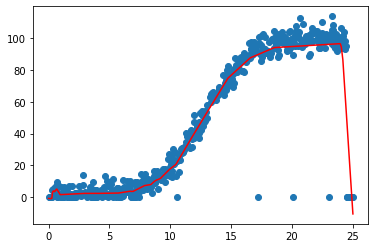

In [168]:
#Creating a plot of predictions based on results
predictions = model.predict(data['speed'])
#plot the x and y coordinates
plt.plot(X,Y,'o')
#plot colour
plt.plot(X,predictions,color = 'red')

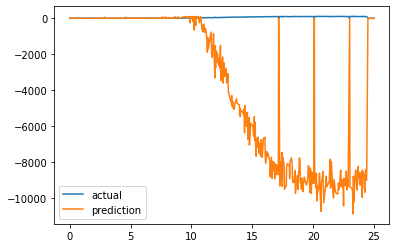

In [169]:
# Now let's see.
plt.plot(data['speed'], data['power'], label='actual')
plt.plot(data['speed'], model.predict(data['power']), label='prediction')
plt.legend();

In [170]:
#Find model test accuracy
scores = model.evaluate(X, Y, verbose = 0)
scores

[98.32817077636719, 0.014000000432133675]

In [171]:
#Save model
model.save('model.h5')
print("Saved model" )

Saved model


In [172]:
#change accuracy
model.predict([1.0,2.0,3.0,100.0])

array([[ 1.7459512e+00],
       [ 2.1640825e+00],
       [ 2.5091219e+00],
       [-9.2243281e+03]], dtype=float32)

***
## Section 4 
This section contains the references used for this project.
***


### References
Ian Mcloughlin (Lecturer) Github:
<br />
[1] https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv
<br />
<br />
Tensorflow documentation:
<br />
[2] https://www.tensorflow.org/
<br />
<br />
Keras documentation:
<br />
[3] https://keras.io/ 
<br />
<br />
Keras models documentation:
<br />
[4] https://keras.io/api/models/
<br />
<br />
Keras sequential model documentation:
<br />
[5] https://keras.io/guides/sequential_model/
<br />
<br />
Keras Layers documentation:
<br />
[6] https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer
<br />
<br />
Keras Layers documentation:
<br />
[7] https://keras.io/api/layers/
<br />
<br />
Numpy documentation:
<br />
[8] https://numpy.org/
<br />
<br />
Pandas documentation:
<br />
[9] https://towardsdatascience.com/top-python-libraries-numpy-pandas-8299b567d955
<br />
<br />
Scikit-Learn documentation:
<br />
[10] https://scikit-learn.org/stable/
<br />
<br />
scikit-learn-python-machine-learning-tool:
<br />
[11] https://www.analyticsvidhya.com/blog/2015/01/scikit-learn-python-machine-learning-tool/
<br />
<br />
matplotlib documentation:
<br />
[12] https://matplotlib.org/
<br />
<br />
what-is-matplotlib:
<br />
[13] https://www.educative.io/edpresso/what-is-matplotlib
<br />
<br />
pandas-python-explore-dataset:
<br />
[14] https://realpython.com/pandas-python-explore-dataset/
<br />
<br />
how-to-build-your-first-neural-network-to-predict-house-prices-with-keras:
<br />
[15] https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/
<br />
<br />
python-keyerror solution: 
<br />
[16] https://realpython.com/python-keyerror/
<br />
<br />
flask-raises-templatenotfound-error-even-though-template-file-exists:
<br />
[17]https://stackoverflow.com/questions/23327293/flask-raises-templatenotfound-error-even-though-template-file-exists
<br />
<br />
deploying-machine-learning-models flask-and-rest-api:
<br />
[18] https://rubikscode.net/2020/02/10/deploying-machine-learning-models-pt-1-flask-and-rest-api/
<br />
<br />
Tensorflow Dense:
<br />
[19] https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
<br />
<br />
keras-input-explanation:
<br />
[20] https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc
<br />
<br />
neural networks deep learning explained:
<br />
[21] https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414
<br />
<br />
inserting an image into ipython notebook markdown:
<br />
[22] https://stackoverflow.com/questions/10628262/inserting-image-into-ipython-notebook-markdown
<br />
<br />